#**CNN Keras Sequential for Cut images**

##Drive preapare

#####Common Labraries

In [ ]:
is_local = False

if not is_local:
  from google.colab import drive
  drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import shutil
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AlphaDropout

print(tf.__version__)

Mounted at /content/drive
2.14.0


#####Create sheet to save data history

In [ ]:
if is_local:
  root_drive ='E:\\Drive\\Poscomp2023\\CutLeaves\\cutleaves-final-augmentation\\original-size\\' #local images original_augmentation_1000each
  split = '\\'
else:
  root_drive = '/content/drive/MyDrive/Poscomp2023/CutLeaves/cutleaves-final-augmentation/original-size/' #remote drive
  split = '/'
dst_path = root_drive + 'history/'

def save_df_history(df_history, optmizer_name, modelid):
  file_name = f'History-{modelid}-Keras-CNN-{optmizer_name}.xlsx'
  with pd.ExcelWriter(dst_path + file_name) as writer:
    df_history.to_excel(writer, sheet_name='sheet1')

def print_df_history(df_history):
  print(df_history)


##Get images

#####Separate image

In [ ]:
width = 300
height = 300


my_class_names = ['health', 'miner', 'rust']

def keras_preprocessing_image_dataset_from_directory(root, step, my_shuffle, my_batch_size):
  if os.path.exists(root+step+'.ipynb_checkpoints'):
    shutil.rmtree(root+step+'.ipynb_checkpoints')
  return tf.keras.preprocessing.image_dataset_from_directory(
            directory = root + step,
            labels = 'inferred', #labels criadas baseadas em subpastas
            label_mode = 'categorical', # mias de duas saíds possíves
            batch_size = my_batch_size,
            image_size = (width, height), #redimensiona imagem para valores de width e height
            shuffle = my_shuffle,  #define se imagens serão embaralhadas nos batch
            #class_names = my_class_names,  # Replace class names
            seed=1, #Allow always the same shuffle (default random)
            #interpolation =  =&quot;bilinear&quot;,#  bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.
            #crop_to_aspect_ratio = False
          )


def get_batch_size(train):
  train_iterator = train.as_numpy_iterator()
  for image, label in train_iterator:
    return image.shape[0]


print('++ Data about loaded dataset ++')
#Batch_size = 32
print('\nDataset batach_size=32')
train_32 = keras_preprocessing_image_dataset_from_directory(root_drive, f'train{split}', True, 32)
valid_32  = keras_preprocessing_image_dataset_from_directory(root_drive, f'valid{split}', False, 32)
test_32 = keras_preprocessing_image_dataset_from_directory(root_drive, f'test{split}', False, 32)
print(f"Load images batch_size={get_batch_size(train_32)}")

print(f'Classes names: {train_32.class_names}')

#Batch_size = 64
print('\nDataset batach_size=64')
train_64 = keras_preprocessing_image_dataset_from_directory(root_drive, f'train{split}', True, 64)
valid_64  = keras_preprocessing_image_dataset_from_directory(root_drive,  f'valid{split}', False, 64)
test_64 = keras_preprocessing_image_dataset_from_directory(root_drive, f'test{split}', False, 64)
print(f"Load images batch_size={get_batch_size(train_64)}")
print(f'Classes names: {train_64.class_names}')

#Batch_size = 128
print('\nDataset batach_size=128')
train_128 = keras_preprocessing_image_dataset_from_directory(root_drive, f'train{split}', True, 128)
valid_128  = keras_preprocessing_image_dataset_from_directory(root_drive,  f'valid{split}', False, 128)
test_128 = keras_preprocessing_image_dataset_from_directory(root_drive, f'test{split}', False, 128)
print(f"Load images batch_size={get_batch_size(train_128)}")
print(f'Classes names: {train_128.class_names}')

++ Data about loaded dataset ++

Dataset batach_size=32
Found 2400 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Load images batch_size=32
Classes names: ['health', 'miner', 'rust']

Dataset batach_size=64
Found 2400 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Load images batch_size=64
Classes names: ['health', 'miner', 'rust']

Dataset batach_size=128
Found 2400 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Load images batch_size=128
Classes names: ['health', 'miner', 'rust']


#####View classes images

Get images and labels

Image color min-max: [0.00-185.17]
Label: [0. 0. 1.]


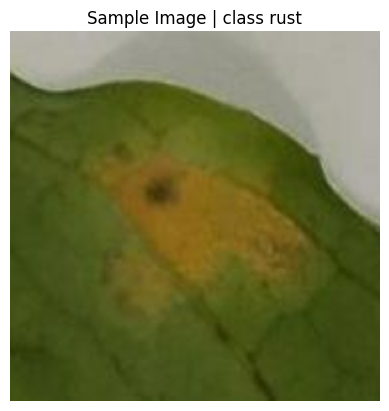

In [ ]:
def convert_label_to_class_name(label):
  id = np.where(sample_label == 1.0)[0][0]
  current_class_name = my_class_names[id]
  return current_class_name

train_32_iterator = train_32.as_numpy_iterator()
for img, label in train_32_iterator:
    break

class_index = 3
sample_image = img[class_index]
sample_label = label[class_index]
print(f'Image color min-max: ' + '[{:.2f}'.format(sample_image.min()) + '-'+ '{:.2f}'.format(sample_image.max()) + ']')
print(f'Label: {sample_label}')
class_name = convert_label_to_class_name(label)
plt.imshow(sample_image/255.0) #inshow plot image only in format color [0,1]
plt.title(f'Sample Image | class {class_name}')
plt.axis('off')
plt.show()
cv2.destroyAllWindows();

In [ ]:
from IPython.core.interactiveshell import validate
#def extract_images_and_labels(images, labels):
#    return images, labels

# Apply the function to each batch of data
#train_dataset = train.map(extract_images_and_labels)
# Iterate over the batches to extract x and y
img_channel = None
print('\nTranning image shape:')
for x, y in train_32:
    print('Batch of images:', x.shape)
    _, _, _, img_channel = x.shape
    print('Batch of labels:', y.shape)
    break

print('\nValidation image shape:')
for x, y in valid_32:
    print('Batch of images:', x.shape)
    print('Batch of labels:', y.shape)
    break

print('\nTesting image shape:')
for x, y in test_32:
    print('Batch of images:', x.shape)
    print('Batch of labels:', y.shape)
    break

print(f'\nImages channel: {img_channel}')

#batch_img_train = 32
#batch_img_train, _ = next(train)
#batch_img_valid, _ = next(valid)
#batch_img_test, _ = next(test)
#print(f"Batch of images shape - train: {batch_img_train.shape}, valid: {batch_img_valid.shape}, test: {batch_img_test.shape} ")
num_classes = len(train_32.class_names)
num_classes


Tranning image shape:
Batch of images: (32, 300, 300, 3)
Batch of labels: (32, 3)

Validation image shape:
Batch of images: (32, 300, 300, 3)
Batch of labels: (32, 3)

Testing image shape:
Batch of images: (32, 300, 300, 3)
Batch of labels: (32, 3)

Images channel: 3


3

##Model

#####Model Xception

In [ ]:
from keras.applications.xception import Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

def model_xception():
  # Load the Xception model without the top layers
  model = Xception(weights='imagenet', include_top=False)

  # Add custom layers for the 3-class classification
  x = model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(128, activation='relu')(x)


  #x = Dense(128, activation='selu', kernel_initializer='lecun_normal')(x)
  #x = Dense(64, activation='selu', kernel_initializer='lecun_normal')(x)
  #x = Dense(32, activation='selu', kernel_initializer='lecun_normal')(x)


  predictions = Dense(3, activation='softmax')(x)

  # Construct the full model
  model = Model(inputs=model.input, outputs=predictions)

  # Optionally, you can freeze the convolutional layers of the Xception model during training
  for layer in model.layers:
      layer.trainable = False

  return model, 'xception'

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten

def model_vgg16():
  # Load the VGG16 model, excluding the top dense layers
  base_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(width, height, img_channel))

  # Freeze the layers of the base model (optional but recommended if using pre-trained weights)
  for layer in base_vgg16.layers:
      layer.trainable = False

  # Add custom classification layers
  x = Flatten()(base_vgg16.output)
  x = Dense(128, activation='selu', kernel_initializer='lecun_normal')(x)
  predictions = Dense(3, activation='softmax')(x)

  vgg16_model = Model(inputs=base_vgg16.input, outputs=predictions)
  return vgg16_model,'vgg16'

#####Model ResNet50

In [ ]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, Flatten

def model_resnet50():
  # Load the ResNet50 model, excluding the top dense layers
  base_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, img_channel))
  # Freeze the layers of the base model (optional but recommended if using pre-trained weights)
  for layer in base_resnet50.layers:
      layer.trainable = False

  # Add custom classification layers
  x = Flatten()(base_resnet50.output)
  x = Dense(128, activation='selu', kernel_initializer='lecun_normal')(x)
  predictions = Dense(3, activation='softmax')(x)

  resnet50_model = Model(inputs=base_resnet50.input, outputs=predictions)
  return resnet50_model,'resnet50'

#####Compile Model Sequential

In [ ]:
def compile_model(model, optimizer):
  model.compile(    optimizer=optimizer,
                    loss='categorical_crossentropy', # para mais de duas classes e para penalizar o modelo quando há erro
                    metrics=[ #tf.keras.metrics.Accuracy(),
                              tf.keras.metrics.categorical_accuracy,
                              tf.keras.metrics.AUC(
                                                    num_thresholds = 200,
                                                    curve = 'ROC',
                                                    summation_method = 'interpolation',
                                                    name = None,
                                                    dtype = None,
                                                    thresholds = None,
                                                    multi_label = True,
                                                    num_labels = None,
                                                    label_weights = None,
                                                    from_logits = False
                                                  ),
                              tf.keras.metrics.Precision(thresholds=None, top_k=None, class_id=None, name=None, dtype=None), #Computes the precision of the predictions with respect to the labels.
                              tf.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None),
                              tf.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None),
                              tf.keras.metrics.TrueNegatives(thresholds=None, name=None, dtype=None),
                              tf.keras.metrics.FalsePositives(thresholds=None, name=None, dtype=None),
                              tf.keras.metrics.FalseNegatives(thresholds=None, name=None, dtype=None)
                            ]
                )
  return model

##Train

#####Show end date

In [ ]:
def calculate_total_time_min(time_start):
  time_end = time()
  time_train_seg = time_end - time_start
  time_train_min = round(time_train_seg/60, 2)
  return  time_train_min

#####Save History

In [ ]:
import pickle

def save_model(model, path_dst, model_filename):
  model.save(path_dst  + model_filename)


def save_history(history, path_dst, history_filename):
  ##Save history
  with open(path_dst  + history_filename, 'wb') as f:
      pickle.dump(history.history, f)

#####Show Loss plot

In [ ]:
def show_history_train(history):
  # Plot training & validation loss values
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], label='Erro de treino')
  plt.plot(history.history['val_loss'], label='Erro de validação')
  plt.title('Erro de treino e validação baseado em iterações')
  plt.xlabel('Iterações')
  plt.ylabel('Erro')
  plt.legend()
  plt.show()

#####Run train

In [ ]:
from matplotlib import pyplot as plt
from time import time
from tensorflow.keras.callbacks import LearningRateScheduler, LambdaCallback


initial_learning_rate = 0.0001

def step_decay(epoch):
    initial_lrate = initial_learning_rate
    drop = 0.5
    epochs_drop = 7
    lrate = initial_lrate * (drop ** (epoch // epochs_drop))
    return lrate

def run_train(model, epochs, train, valid):
  early_stopping_patience = 10
  early_stopping = keras.callbacks.EarlyStopping(
      monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
  )
  lrate_callback = LearningRateScheduler(step_decay)
  # Create a LambdaCallback to print the learning rate at the end of each epoch
  print_lrate = LambdaCallback(on_epoch_end=lambda epoch, logs: print(f"\nLearning Rate at end of epoch {epoch}: {model.optimizer.learning_rate.numpy()}"))
  history = model.fit(
                        train,
                        #steps_per_epoch=train.n // batch_size,
                        epochs=epochs,
                        #batch_size=batch_size,
                        validation_data=valid,
                        callbacks=[early_stopping, lrate_callback, print_lrate],
                        verbose=1,
                        #validation_steps=valid.n // batch_size
                      )
  return history

def call_train(model, train, valid, epochs, batch_size, model_filename, history_filename):
  time_start = time()
  history_train = run_train(model, epochs, train, valid)
  time_train_min = calculate_total_time_min(time_start)
  print('\n')
  show_history_train(history_train)
  print('\n')
  save_model(model, dst_path, model_filename)
  save_history(history_train, dst_path, history_filename)
  return time_train_min

##Test

#####Get Test Labels and predicitions

In [ ]:
def get_true_and_predicted_labels(model, test_data):
  predictions = model.predict(test_data)
  predicted_labels = np.argmax(predictions, axis=1)
  #print(predictions)
  true_labels = []
  # Iterate through the test_data dataset to extract true labels
  for images, labels in test_data:
      true_labels.extend(np.argmax(labels, axis=1))
  # Convert the list of true labels to a NumPy array
  true_labels = np.array(true_labels)

  n_classes = len(np.unique(true_labels))
  return true_labels, predicted_labels, predictions, n_classes

#####ROC plot

In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc(model, test_data):
  fpr = {}
  tpr = {}
  roc_auc = {}

  true_labels, predicted_labels, predictions, n_classes = get_true_and_predicted_labels(model, test_data)
  # Compute ROC curve and ROC area for each class
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve((true_labels == i).astype(int), predictions[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot ROC curves
  plt.figure(figsize=(8, 6))
  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

  # Plot random chance line
  plt.plot([0, 1], [0, 1], 'k--', lw=2)

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()


#####Print classes metrics

In [ ]:
from sklearn.metrics import roc_curve, auc
def print_classes_metrics(model, test_data):
  fpr = {}
  tpr = {}
  roc_auc = {}

  true_labels, predicted_labels, predictions, n_classes = get_true_and_predicted_labels(model, test_data)
  # Compute ROC curve and ROC area for each class
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve((true_labels == i).astype(int), predictions[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      precision[i], recall[i], _ = precision_recall_curve((true_labels == i).astype(int), predictions[:, i])
      f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

      print(f'\n\nClass {i} Metrics')



#####Confusion Matrix

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from PIL import Image

def plot_confusion_matrix(model, test_data):
    # Use the model to predict the values from the test_images.
    test_pred_raw = model.predict(test_data)
    test_pred = np.argmax(test_pred_raw, axis=1)

    y_test = tf.concat([y for x, y in test_data], axis=0)
    test_labels = np.argmax(y_test, axis=1)

    # Calculate the confusion matrix using sklearn.metrics
    cm = confusion_matrix(y_true=test_labels, y_pred=test_pred)

    #print(cm)

    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(test_data.class_names))
    plt.xticks(tick_marks, test_data.class_names, rotation=45)
    plt.yticks(tick_marks, test_data.class_names)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    figure

#####Run test

In [ ]:
def call_test(model, test_data):
  test_metrics = model.evaluate(test_data)
  print('\n');
  plot_roc(model, test_data)
  print('\n')
  plot_confusion_matrix(model, test_data)
  print('\n')
  return test_metrics

##Main

###Main code

In [ ]:
def main(model, train, valid, test, learning_rate, batch_size, optimizer_param, optimizer, epochs, layers_config_number, momentum, df_history, modelid):
  print('\n\n======================================================================\n')
  print('+++ Trainning and Validation +++',end='\n\n')
  print(f'Epochs: {1} | Optmizer: {optimizer} | Batch size = {batch_size} | Learning rate = {learning_rate} | Momentum = {momentum}|Layers configuration: {layers_config_number} \n\n')
  compile_model(model, optimizer_param)
  filename = f'epochs{epochs}_batch{batch_size}_layers{layers_config_number}_momentum{momentum}'
  model_filename = f'{optimizer}/model_{optimizer}_{filename}'
  history_filename = f'{optimizer}/history_{optimizer}_{filename}'
  time_train_min = call_train(model, train, valid, epochs, batch_size, model_filename, history_filename)
  time_train_hr = round(time_train_min/60, 2)
  time_train_min = round(time_train_min, 2)
  print(f'\nTotal time for trainning and validation: {time_train_min} (min) or {time_train_hr} (hr) \n\n')
  print('\n\n +++ Testing +++ \n')
  test_metrics = call_test(model, test)
  loss = test_metrics[0]
  accuracy = test_metrics[1]
  auc = test_metrics[2]
  precision = test_metrics[3]
  recall = test_metrics[4]
  true_positives  = test_metrics[5]
  true_negatives = test_metrics[6]
  false_positives = test_metrics[7]
  false_negatives = test_metrics[8]
  list = [epochs, optimizer, batch_size, learning_rate , momentum, layers_config_number, time_train_min, time_train_hr,  loss, accuracy, auc, precision, recall, true_positives, true_negatives, false_positives, false_negatives, model_filename, history_filename]
  df_history.loc[len(df_history)] = list
  save_df_history(df_history, optimizer, modelid)
  del list, epochs, optimizer, batch_size, learning_rate, layers_config_number, time_train_min, time_train_hr,  loss, accuracy, auc, precision, recall, true_positives, true_negatives, false_positives, false_negatives, model_filename, history_filename, filename


###Common values

In [ ]:
epochs = 60
dataset_batch_size_list = ((train_32, valid_32, test_32), (train_64, valid_64, test_64), (train_128, valid_128, test_128))
learning_rate_list = (0.01, 0.001, 0.0001, 0.00001)
momentum_list = (0, 0.9, 0.99)

###Optimizer = 'adam'

####Model Xception

83683744/83683744 [==============================] - 0s 0us/step

Used Model xception:

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block

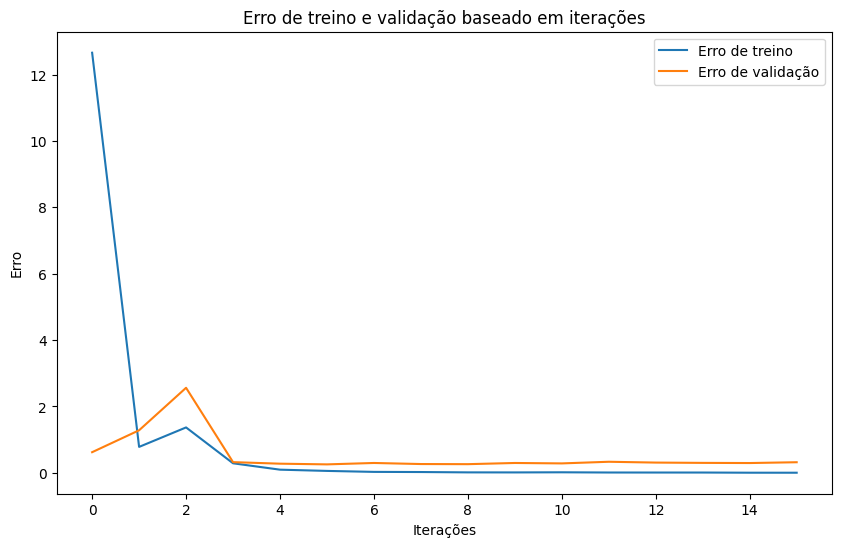




Total time for trainning and validation: 2.99 (min) or 0.05 (hr) 




 +++ Testing +++ 

10/10 [==============================] - 15s 2s/step - loss: 0.1738 - categorical_accuracy: 0.9567 - auc: 0.9902 - precision: 0.9567 - recall: 0.9567 - true_positives: 287.0000 - true_negatives: 587.0000 - false_positives: 13.0000 - false_negatives: 13.0000


10/10 [==============================] - 1s 101ms/step


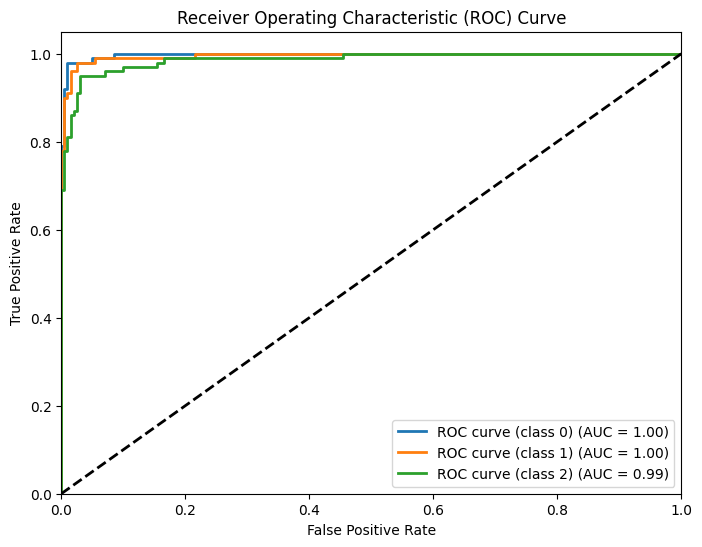



10/10 [==============================] - 0s 25ms/step





+++ Trainning and Validation +++

Epochs: 1 | Optmizer: adam  | Batch size = 64 | Learning rate = learning_rate | Momentum = default|Layers configuration: 4 


Epoch 1/60
37/38 [============================>.] - ETA: 0s - loss: 10.4232 - categorical_accuracy: 0.6655 - auc_1: 0.7858 - precision_1: 0.6664 - recall_1: 0.6655 - true_positives_1: 1576.0000 - true_negatives_1: 3947.0000 - false_positives_1: 789.0000 - false_negatives_1: 792.0000
Learning Rate at end of epoch 0: 9.999999747378752e-05
38/38 [==============================] - 10s 187ms/step - loss: 10.3268 - categorical_accuracy: 0.6658 - auc_1: 0.7862 - precision_1: 0.6667 - recall_1: 0.6658 - true_positives_1: 1598.0000 - true_negatives_1: 4001.0000 - false_positives_1: 799.0000 - false_negatives_1: 802.0000 - val_loss: 1.4436 - val_categorical_accuracy: 0.8300 - val_auc_1: 0.9063 - val_precision_1: 0.8328 - val_recall_1: 0.8300 - val_true_positives_1: 249.0000 - va

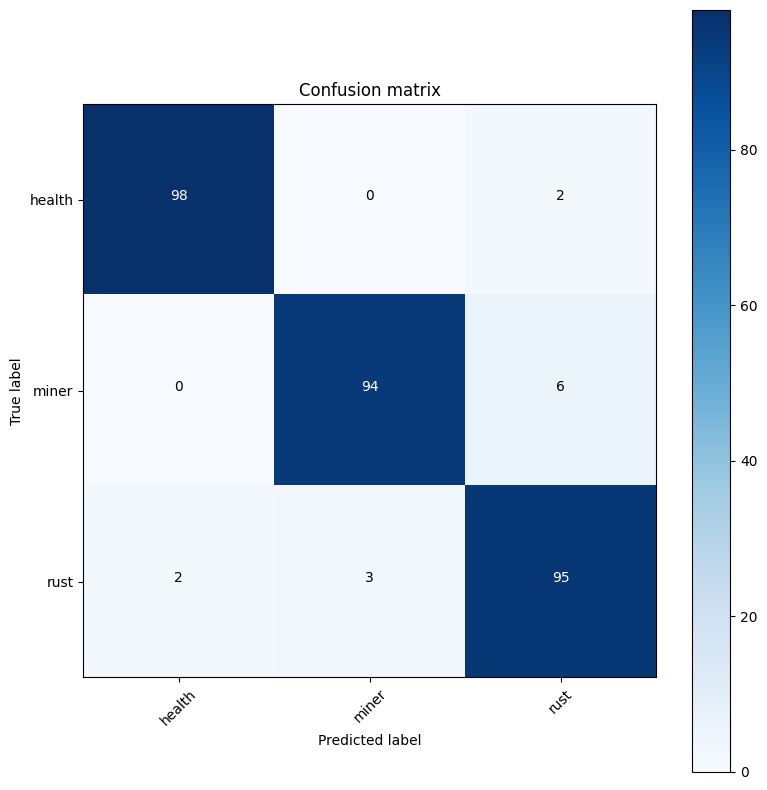

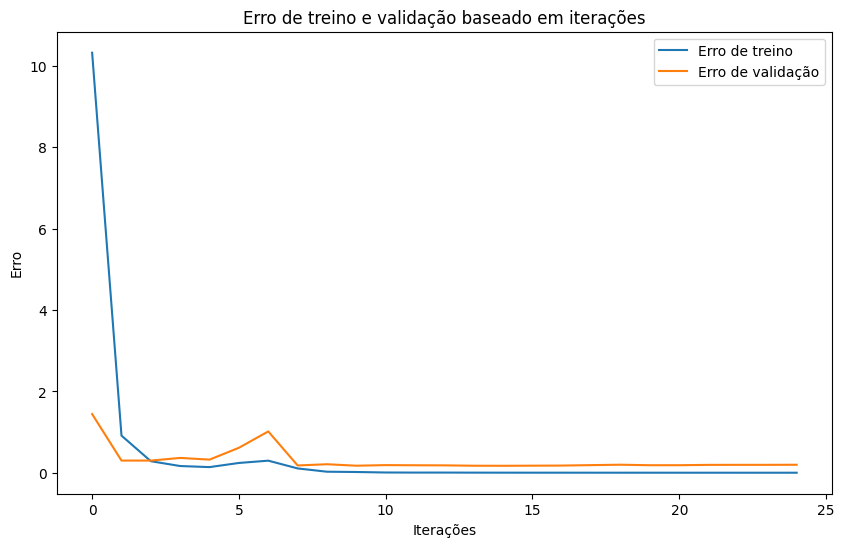




Total time for trainning and validation: 2.41 (min) or 0.04 (hr) 




 +++ Testing +++ 

5/5 [==============================] - 0s 88ms/step - loss: 0.1029 - categorical_accuracy: 0.9800 - auc_1: 0.9966 - precision_1: 0.9800 - recall_1: 0.9800 - true_positives_1: 294.0000 - true_negatives_1: 594.0000 - false_positives_1: 6.0000 - false_negatives_1: 6.0000


5/5 [==============================] - 0s 46ms/step


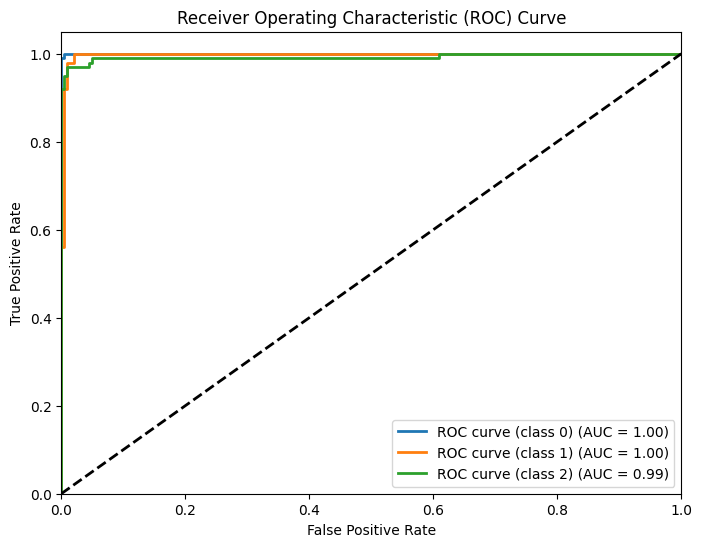



5/5 [==============================] - 0s 48ms/step





+++ Trainning and Validation +++

Epochs: 1 | Optmizer: adam  | Batch size = 128 | Learning rate = learning_rate | Momentum = default|Layers configuration: 4 


Epoch 1/60
19/19 [==============================] - ETA: 0s - loss: 89.1488 - categorical_accuracy: 0.3350 - auc_2: 0.5030 - precision_2: 0.3350 - recall_2: 0.3350 - true_positives_2: 804.0000 - true_negatives_2: 3204.0000 - false_positives_2: 1596.0000 - false_negatives_2: 1596.0000
Learning Rate at end of epoch 0: 9.999999747378752e-05
19/19 [==============================] - 10s 319ms/step - loss: 89.1488 - categorical_accuracy: 0.3350 - auc_2: 0.5030 - precision_2: 0.3350 - recall_2: 0.3350 - true_positives_2: 804.0000 - true_negatives_2: 3204.0000 - false_positives_2: 1596.0000 - false_negatives_2: 1596.0000 - val_loss: 20.4607 - val_categorical_accuracy: 0.4767 - val_auc_2: 0.6266 - val_precision_2: 0.4767 - val_recall_2: 0.4767 - val_true_positives_2: 143.0000 - 

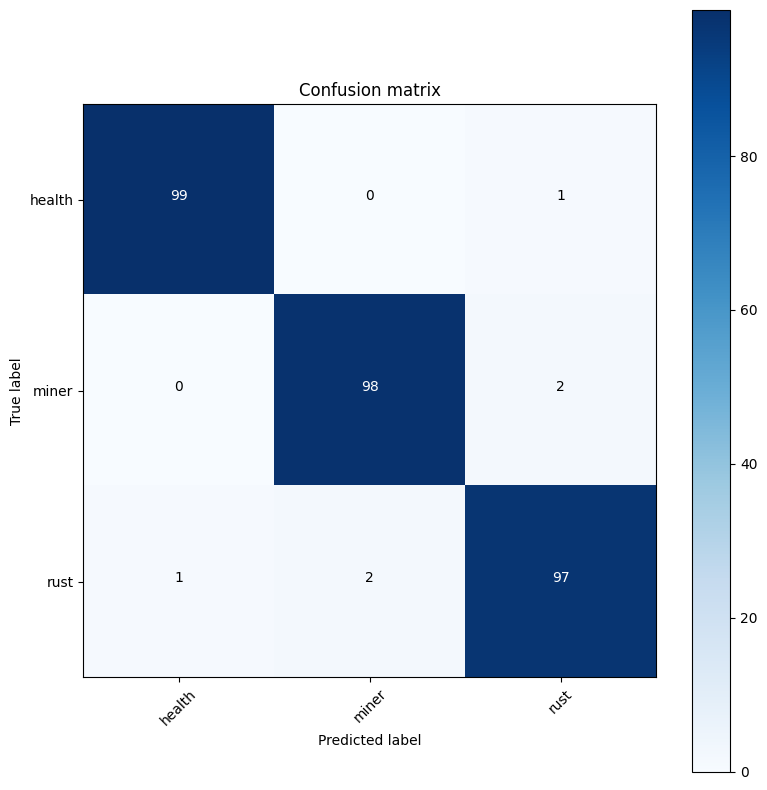

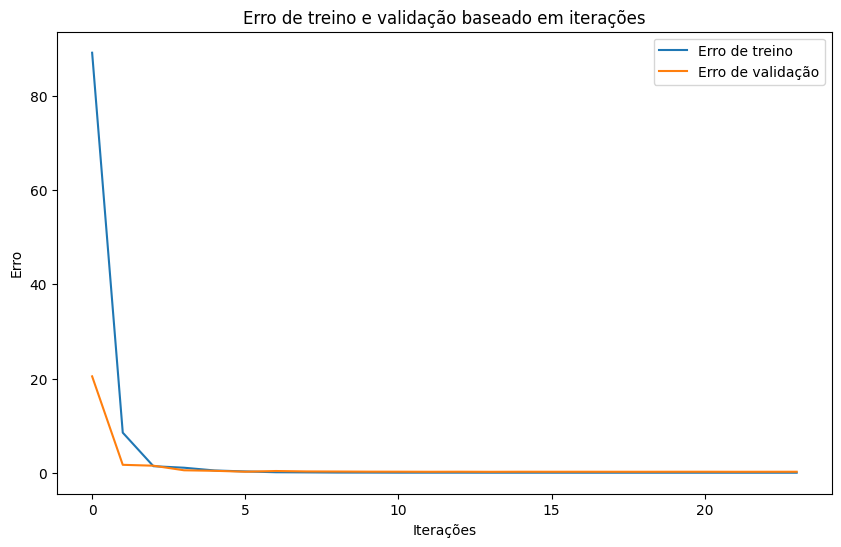




Total time for trainning and validation: 2.07 (min) or 0.03 (hr) 




 +++ Testing +++ 

3/3 [==============================] - 0s 68ms/step - loss: 0.1807 - categorical_accuracy: 0.9433 - auc_2: 0.9932 - precision_2: 0.9465 - recall_2: 0.9433 - true_positives_2: 283.0000 - true_negatives_2: 584.0000 - false_positives_2: 16.0000 - false_negatives_2: 17.0000


3/3 [==============================] - 1s 139ms/step


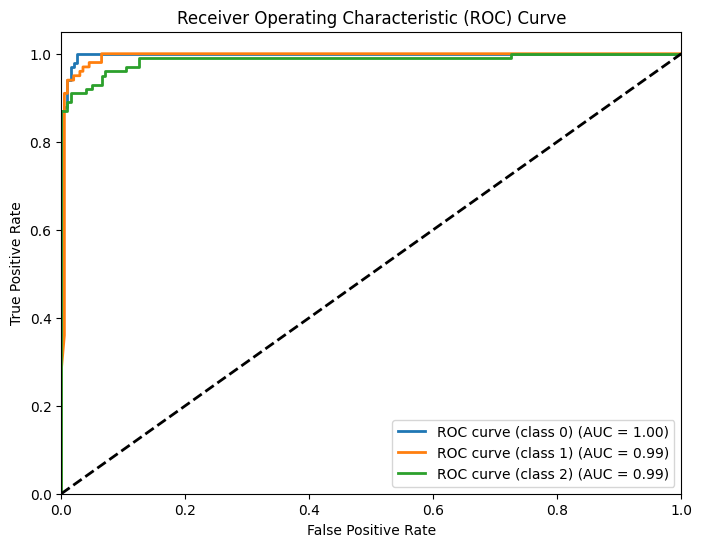



3/3 [==============================] - 0s 66ms/step




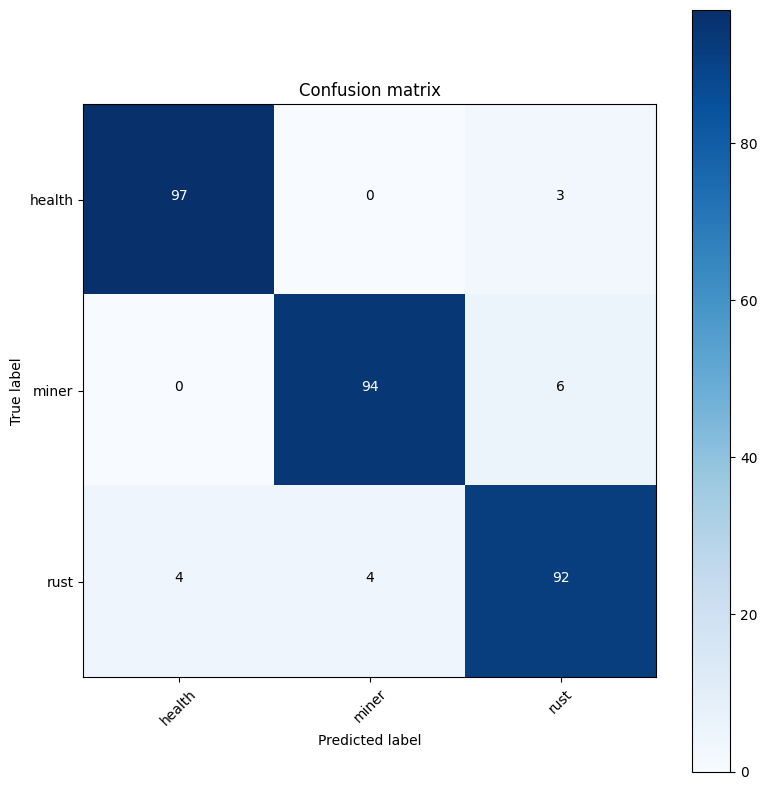

In [ ]:
#Store history to insert to sheet
df_history_adam = pd.DataFrame(columns=['Epochs', 'Optmizer', 'Batch_size', 'Learning_rate', 'Momentum','Layers_config', 'Training_time(min)', 'Training_time(hr)' , 'Loss', 'Accuracy', 'Auc', 'Precision', 'Recall', 'True_positives', 'True_negatives', 'False_positives', 'False_negatives','Model_filename' ,'History_filename'])
def call_adam_model_xception():
  optimizer='adam '
  model_adam_print, modelid = model_xception()
  print(f'\nUsed Model {modelid}:\n')
  model_adam_print.summary()
  print('\n')
  for dataset_batch_size in dataset_batch_size_list:
    #for learning_rate in learning_rate_list:
    train = dataset_batch_size[0]
    valid = dataset_batch_size[1]
    test = dataset_batch_size[2]
    batch_size = get_batch_size(train)
    model_adam, layers_config_adam = model4()
    optimizer_param = keras.optimizers.Adam(learning_rate=initial_learning_rate)
    main(model=model_adam, train=train, valid=valid, test=test, learning_rate='learning_rate', batch_size=batch_size, optimizer_param=optimizer_param, optimizer=optimizer, epochs=epochs, layers_config_number=layers_config_adam, momentum='default', df_history=df_history_adam, modelid=modelid)
    del model_adam
call_adam_model_xception()

####Model Resnet50


Used Model resnet50:

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 306, 306, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 150, 150, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 150, 150, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                 

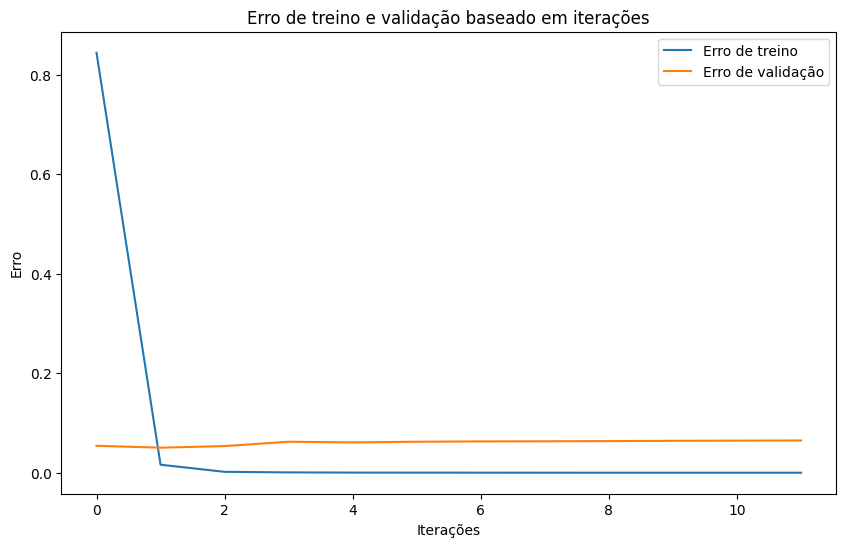




Total time for trainning and validation: 2.11 (min) or 0.04 (hr) 




 +++ Testing +++ 

10/10 [==============================] - 2s 180ms/step - loss: 0.0273 - categorical_accuracy: 0.9900 - auc_4: 0.9998 - precision_4: 0.9900 - recall_4: 0.9900 - true_positives_4: 297.0000 - true_negatives_4: 597.0000 - false_positives_4: 3.0000 - false_negatives_4: 3.0000


10/10 [==============================] - 2s 134ms/step


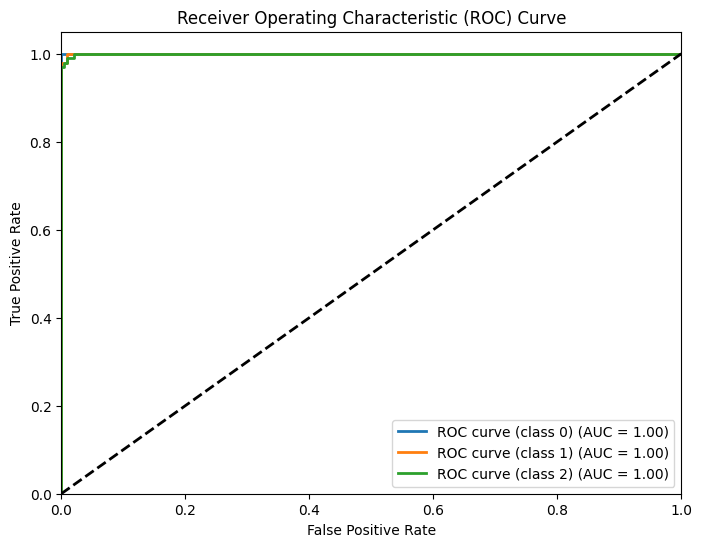



10/10 [==============================] - 1s 60ms/step





+++ Trainning and Validation +++

Epochs: 1 | Optmizer: adam  | Batch size = 64 | Learning rate = 0.0001 | Momentum = default|Layers configuration: resnet50 


Epoch 1/60
38/38 [==============================] - ETA: 0s - loss: 1.4829 - categorical_accuracy: 0.8621 - auc_5: 0.9400 - precision_5: 0.8667 - recall_5: 0.8587 - true_positives_5: 2061.0000 - true_negatives_5: 4483.0000 - false_positives_5: 317.0000 - false_negatives_5: 339.0000
Learning Rate at end of epoch 0: 9.999999747378752e-05
38/38 [==============================] - 16s 283ms/step - loss: 1.4829 - categorical_accuracy: 0.8621 - auc_5: 0.9400 - precision_5: 0.8667 - recall_5: 0.8587 - true_positives_5: 2061.0000 - true_negatives_5: 4483.0000 - false_positives_5: 317.0000 - false_negatives_5: 339.0000 - val_loss: 0.0883 - val_categorical_accuracy: 0.9733 - val_auc_5: 0.9971 - val_precision_5: 0.9733 - val_recall_5: 0.9733 - val_true_positives_5: 292.0000 - val_

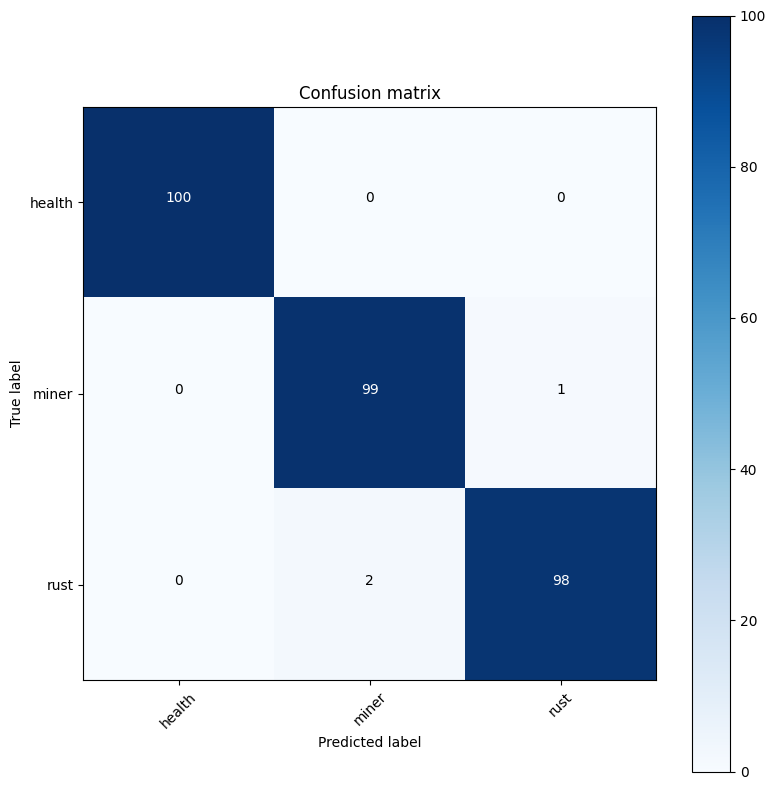

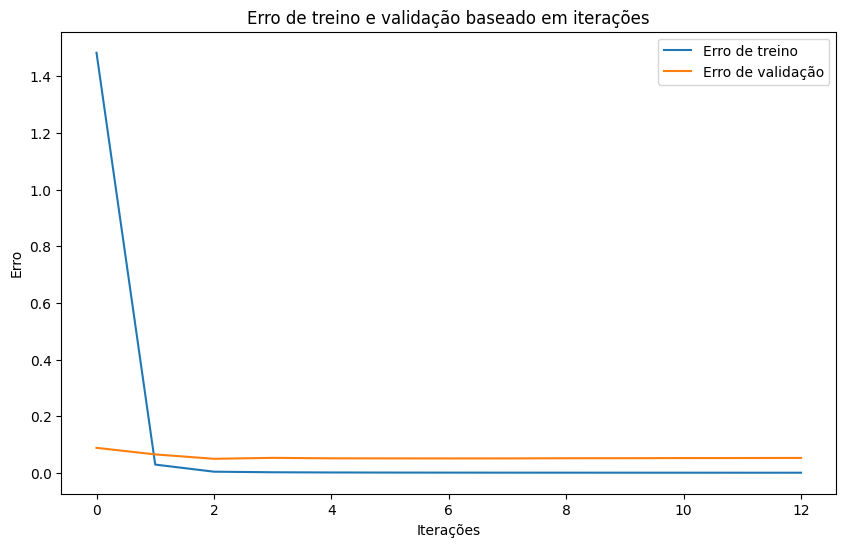




Total time for trainning and validation: 2.12 (min) or 0.04 (hr) 




 +++ Testing +++ 

5/5 [==============================] - 1s 314ms/step - loss: 0.0231 - categorical_accuracy: 0.9967 - auc_5: 0.9997 - precision_5: 0.9967 - recall_5: 0.9967 - true_positives_5: 299.0000 - true_negatives_5: 599.0000 - false_positives_5: 1.0000 - false_negatives_5: 1.0000


5/5 [==============================] - 2s 220ms/step


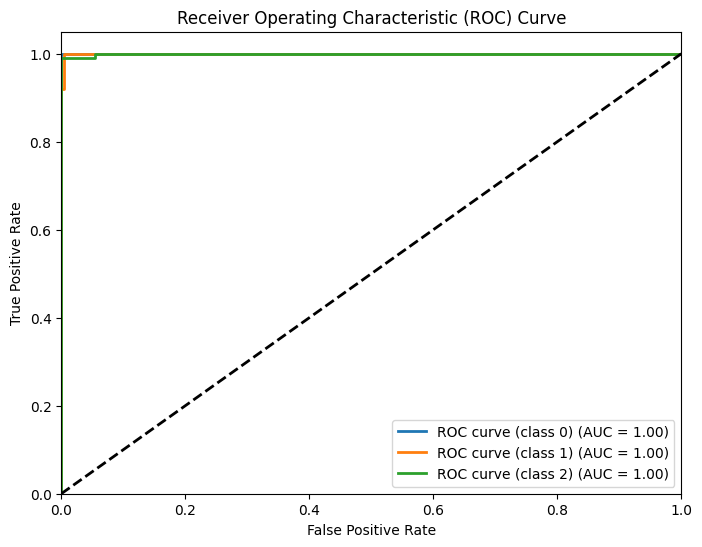



5/5 [==============================] - 1s 131ms/step





+++ Trainning and Validation +++

Epochs: 1 | Optmizer: adam  | Batch size = 128 | Learning rate = 0.0001 | Momentum = default|Layers configuration: resnet50 


Epoch 1/60
19/19 [==============================] - ETA: 0s - loss: 1.5131 - categorical_accuracy: 0.8408 - auc_6: 0.9302 - precision_6: 0.8443 - recall_6: 0.8383 - true_positives_6: 2012.0000 - true_negatives_6: 4429.0000 - false_positives_6: 371.0000 - false_negatives_6: 388.0000
Learning Rate at end of epoch 0: 9.999999747378752e-05
19/19 [==============================] - 18s 572ms/step - loss: 1.5131 - categorical_accuracy: 0.8408 - auc_6: 0.9302 - precision_6: 0.8443 - recall_6: 0.8383 - true_positives_6: 2012.0000 - true_negatives_6: 4429.0000 - false_positives_6: 371.0000 - false_negatives_6: 388.0000 - val_loss: 0.0896 - val_categorical_accuracy: 0.9700 - val_auc_6: 0.9963 - val_precision_6: 0.9700 - val_recall_6: 0.9700 - val_true_positives_6: 291.0000 - val_

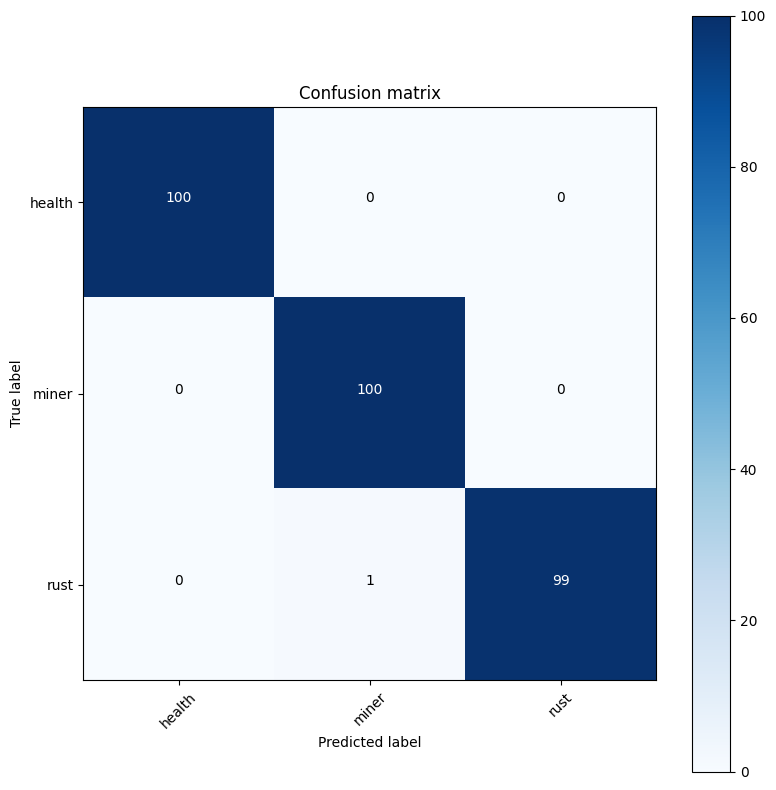

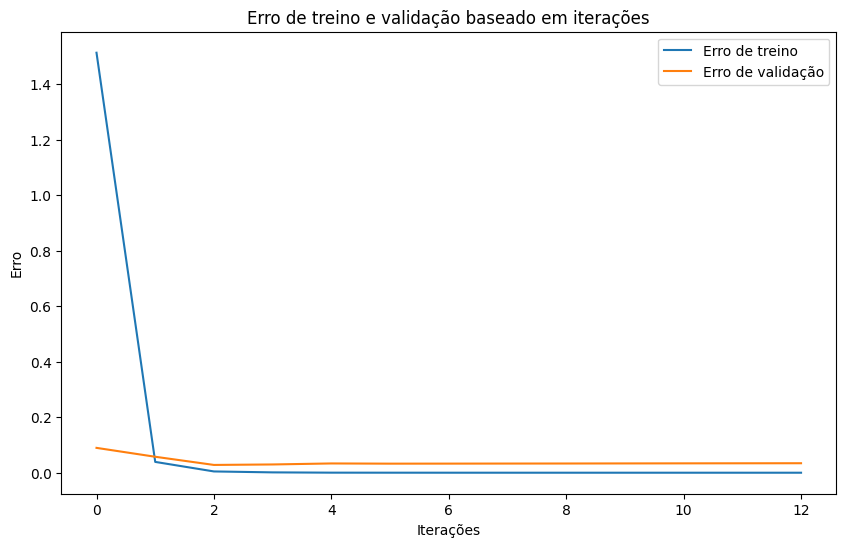




Total time for trainning and validation: 1.97 (min) or 0.03 (hr) 




 +++ Testing +++ 

3/3 [==============================] - 1s 251ms/step - loss: 0.0331 - categorical_accuracy: 0.9900 - auc_6: 0.9997 - precision_6: 0.9900 - recall_6: 0.9900 - true_positives_6: 297.0000 - true_negatives_6: 597.0000 - false_positives_6: 3.0000 - false_negatives_6: 3.0000


3/3 [==============================] - 2s 400ms/step


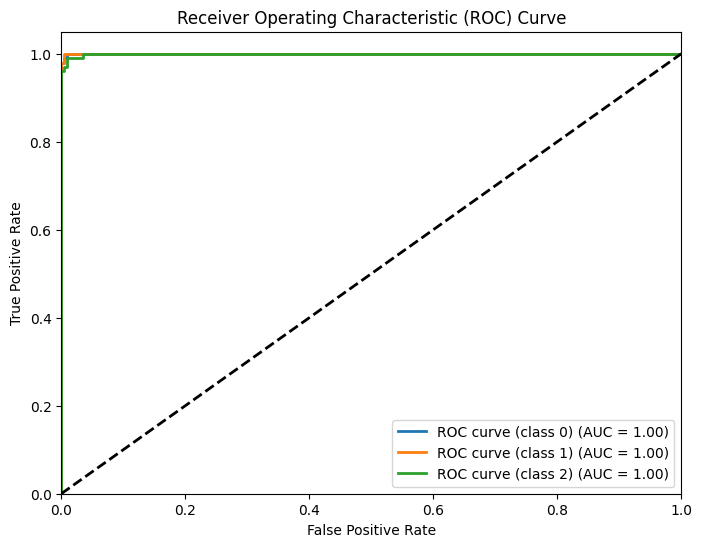



3/3 [==============================] - 1s 205ms/step




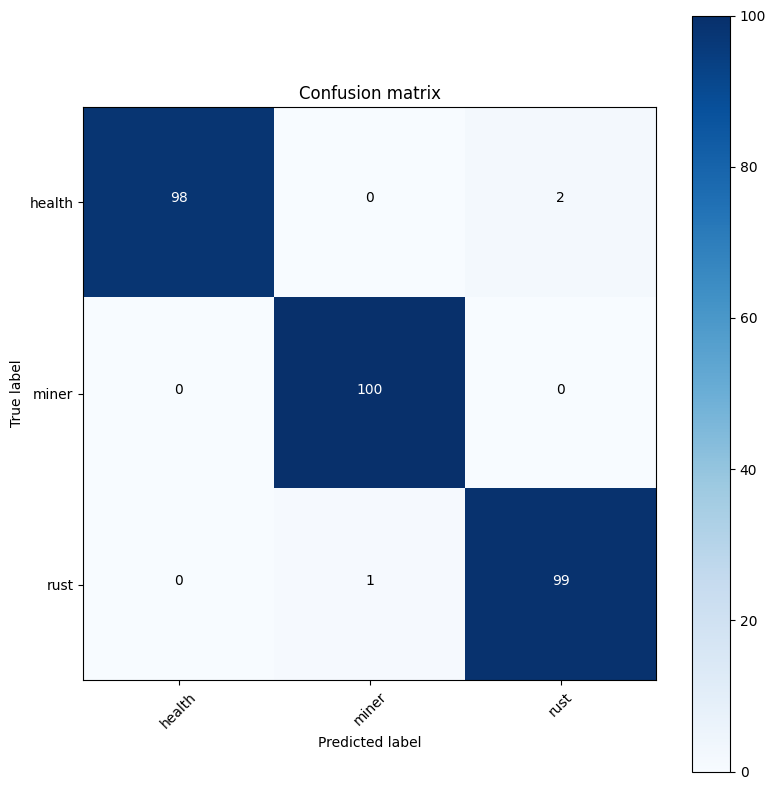

In [ ]:
#Store history to insert to sheet
df_history_adam = pd.DataFrame(columns=['Epochs', 'Optmizer', 'Batch_size', 'Learning_rate', 'Momentum','Layers_config', 'Training_time(min)', 'Training_time(hr)' , 'Loss', 'Accuracy', 'Auc', 'Precision', 'Recall', 'True_positives', 'True_negatives', 'False_positives', 'False_negatives','Model_filename' ,'History_filename'])
def call_adam_model_xception():
  optimizer='adam '
  model_adam_print, modelid = model_resnet50()
  print(f'\nUsed Model {modelid}:\n')
  model_adam_print.summary()
  print('\n')
  for dataset_batch_size in dataset_batch_size_list:
    #for learning_rate in learning_rate_list:
    train = dataset_batch_size[0]
    valid = dataset_batch_size[1]
    test = dataset_batch_size[2]
    batch_size = get_batch_size(train)
    model_adam, layers_config_adam = model_resnet50()
    optimizer_param = keras.optimizers.Adam(learning_rate=initial_learning_rate)
    main(model=model_adam, train=train, valid=valid, test=test, learning_rate=initial_learning_rate, batch_size=batch_size, optimizer_param=optimizer_param, optimizer=optimizer, epochs=epochs, layers_config_number=layers_config_adam, momentum='default', df_history=df_history_adam, modelid=modelid)
    del model_adam
call_adam_model_xception()